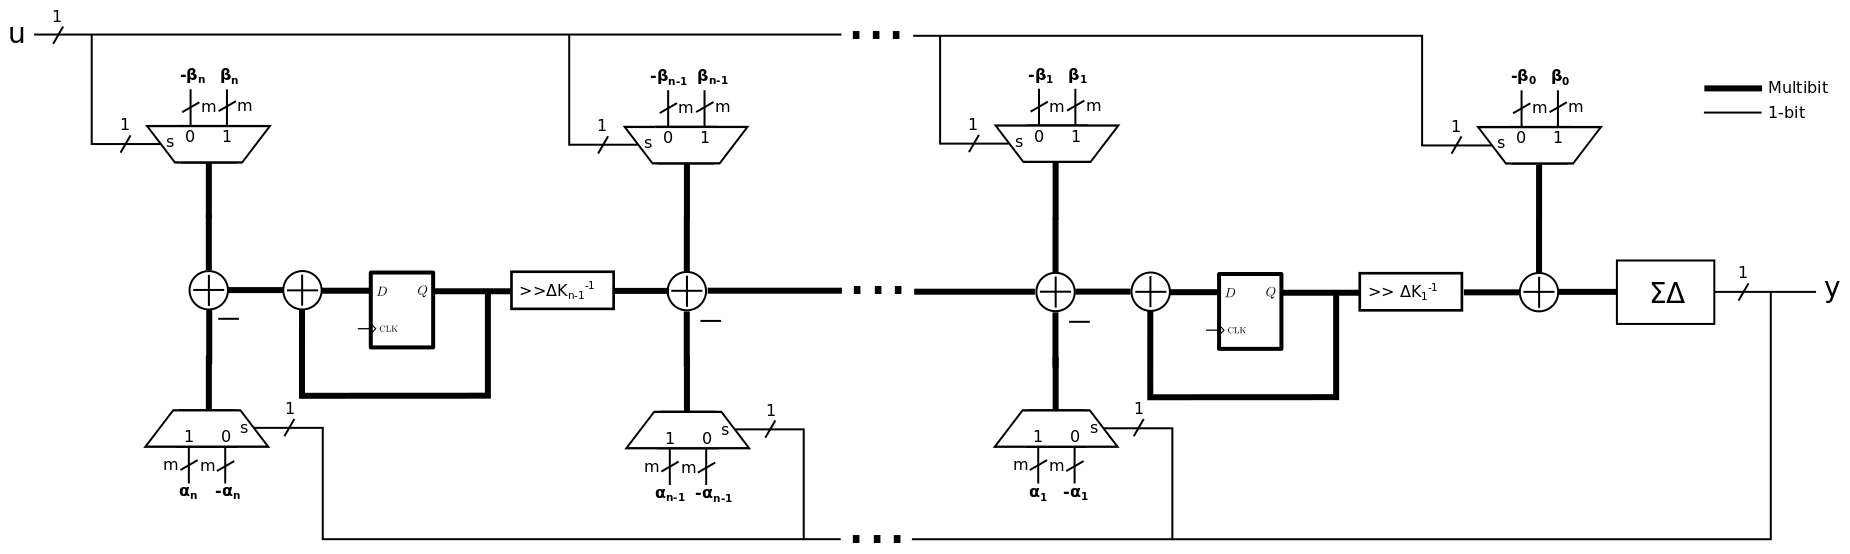

In [1]:
from IPython.display import Image
Image(filename='./Figures/IIR.png')

# $\Sigma\Delta$ Stream Computation

$\Sigma\Delta$ Stream Computation is a strategy for implementing low complexity, low power, low latency, continuous time performance controllers in digital logic. The control implementation strategy does this by directly processing high resolution, high bandwidth $\Sigma\Delta$ encoded bitstreams. Both inputs and outputs can be encoded as sigma-delta bitstreams leading to inexpensive hardware realizations. This also allows direct connection between $\Sigma\Delta$ converters and the controller hardware without need to perform parallel data conversion and thus eliminates the associated overhead and latency.

![Shift Based $\Sigma\Delta$ Filter Architecture](./Figures/IIR.png)

[$\Sigma\Delta$ Stream Computation](https://escholarship.org/uc/item/4f46n0h6)

## Goals
- Make $\Sigma\Delta$ Stream Computation accessible to a wider audience
- ipython Jupyter notebooks that elucidate the underlying math with python applications
    - Inputs: state space model, OSR and sampling bit rate
    - Outputs: optimized cofficents for Stream Computation  
    - SystemVerilog implementations and simulations
    
## Benefits of $\Sigma\Delta$ Stream Computation
- Direct computation on $\Sigma\Delta$ encoded bitstreams
- Lower latency, xOSR less
- Less resources, mutiplier-less, 10x
- Based on integraters vs time shift
    - Removed Singularity at $1 + j0$

[$\Sigma\Delta$ Stream Computation](https://escholarship.org/uc/item/4f46n0h6)

## Gravitating Poles & Zeros
The current paradigm in discrete filter design revolves around shift based algorithms. The shift operator $q$ can be defined as

$qx\left(k\Delta\right)=x\left(k\Delta+\Delta\right)$

The sampling zero displays very little variation with sampling rate while the poles and zeros change significantly. The poles and zeros are more heavily dependent on $\Delta$. The significant zeros and poles converge to $1 + j0$ as $\Delta$ $\rightarrow 0$ causing the system to blow up.  

![Z domain poles and zeros](./Figures/z_domain_pz.png)

The $\delta$-operator is a difference based operator defined as

$\delta x\left(k\Delta\right)\triangleq\frac{x\left(k\Delta+\Delta\right)-x\left(k\Delta\right)}{\Delta}$

which is analogous to a discrete derivative approximation. Taking the limit of $\delta x\left(k\right)$ as the sampling period approaches zero we have

$\underset{\Delta\rightarrow0}{lim}\delta x\left(k\Delta\right)=\underset{\Delta\rightarrow0}{lim}\frac{x\left(k\Delta+\Delta\right)-x\left(k\Delta\right)}{\Delta}=\frac{dx}{dt}$

The significant poles and zeros are largely independent of the sampling rate and converge to their continuous time counterparts as $\Delta$ $\rightarrow 0$.

![Z domain poles and zeros](./Figures/d_domain_pz.png)

[Digital Control and Estimation](https://dl.acm.org/doi/10.5555/574885)

## Why not Shift-Based LTI?

As the sampling period approaches zero, the poles of the filters converge to z=1 on the unit circle in the complex plane. In fixed point realizations where the coefficients of a filter are represented with finite precision, the possible locations of filter poles in the unit circle stability region of the Z domain become sparse in and around the real axis. The figure illustrates this effect for a fourth order lowpass filter while increasing the sample rate from 1kHz to 10kHz. As can be seen the poles and zeros converge quickly. What is more disturbing is that the black dots represent the quantization points for 5 bit coefficients in the filter.

Notice that z=1 is not a possible location within the unit circle for complex conjugate poles with distinct complex components. As sampling rates increase, discerning between distinct complex conjugate poles requires larger coefficient bitwidths leading to ever expanding logic implementations. Without, large coefficient bitwidths, the filter will experience severe filter magnitude and phase response deviations as well as the potential for instability. It seems counter intuitive that as the sample rate increases the numerical stability of the fixed point filter implementation decreases.

![5-bit Fixed Point Pole Locations for Direct Form IIR Filter](./Figures/pz_map.png)

[$\Sigma\Delta$ Stream Computation](https://escholarship.org/uc/item/4f46n0h6)



# Example Implementations


Several digital filter implementations using $\Sigma\Delta$ stream computation are listed below. The computations are broken up into five steps.

1. Pick a filter to implement
   - Generate a continuous state space model for the filter
2. Convert the continuous state space model into a digitally sampled $\delta\$ domain representation
3. Preform a sensitivity analysis
4. Analyze the noise gain
5. Use the sensitivity and noise gain analysis to calculate the optimal fixed point representations of the coefficients and internal node gains

## Pick a filter to implement

[cheby2 bandpass - 300Hz to 3kHz](./1_cheby2_bandpass.ipynb)


---
---

---
# References
[$\Sigma\Delta$ Stream Computation: A New Paradigm for Low Power and High Resolution Feedback Control](https://escholarship.org/uc/item/4f46n0h6) by Poverelli, Joseph Sam

[Digital Control and Estimation: A Unified Approach](https://dl.acm.org/doi/10.5555/574885) by Richard H Middleton & 
Graham C Goodwin

[A generalized direct-form delta operator-based IIR filter with minimum noise gain and sensitivity](https://ieeexplore.ieee.org/document/933811) by Ngai Wong & Tung-Sang Ng